# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt # or  import matplotlib.pyplot as plt

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [27]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [4]:
df_taxi[:3]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [14]:
df_taxi.shape

(6433, 14)

In [15]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

Очікуваний результат (можна вивести в окремих клітинках):

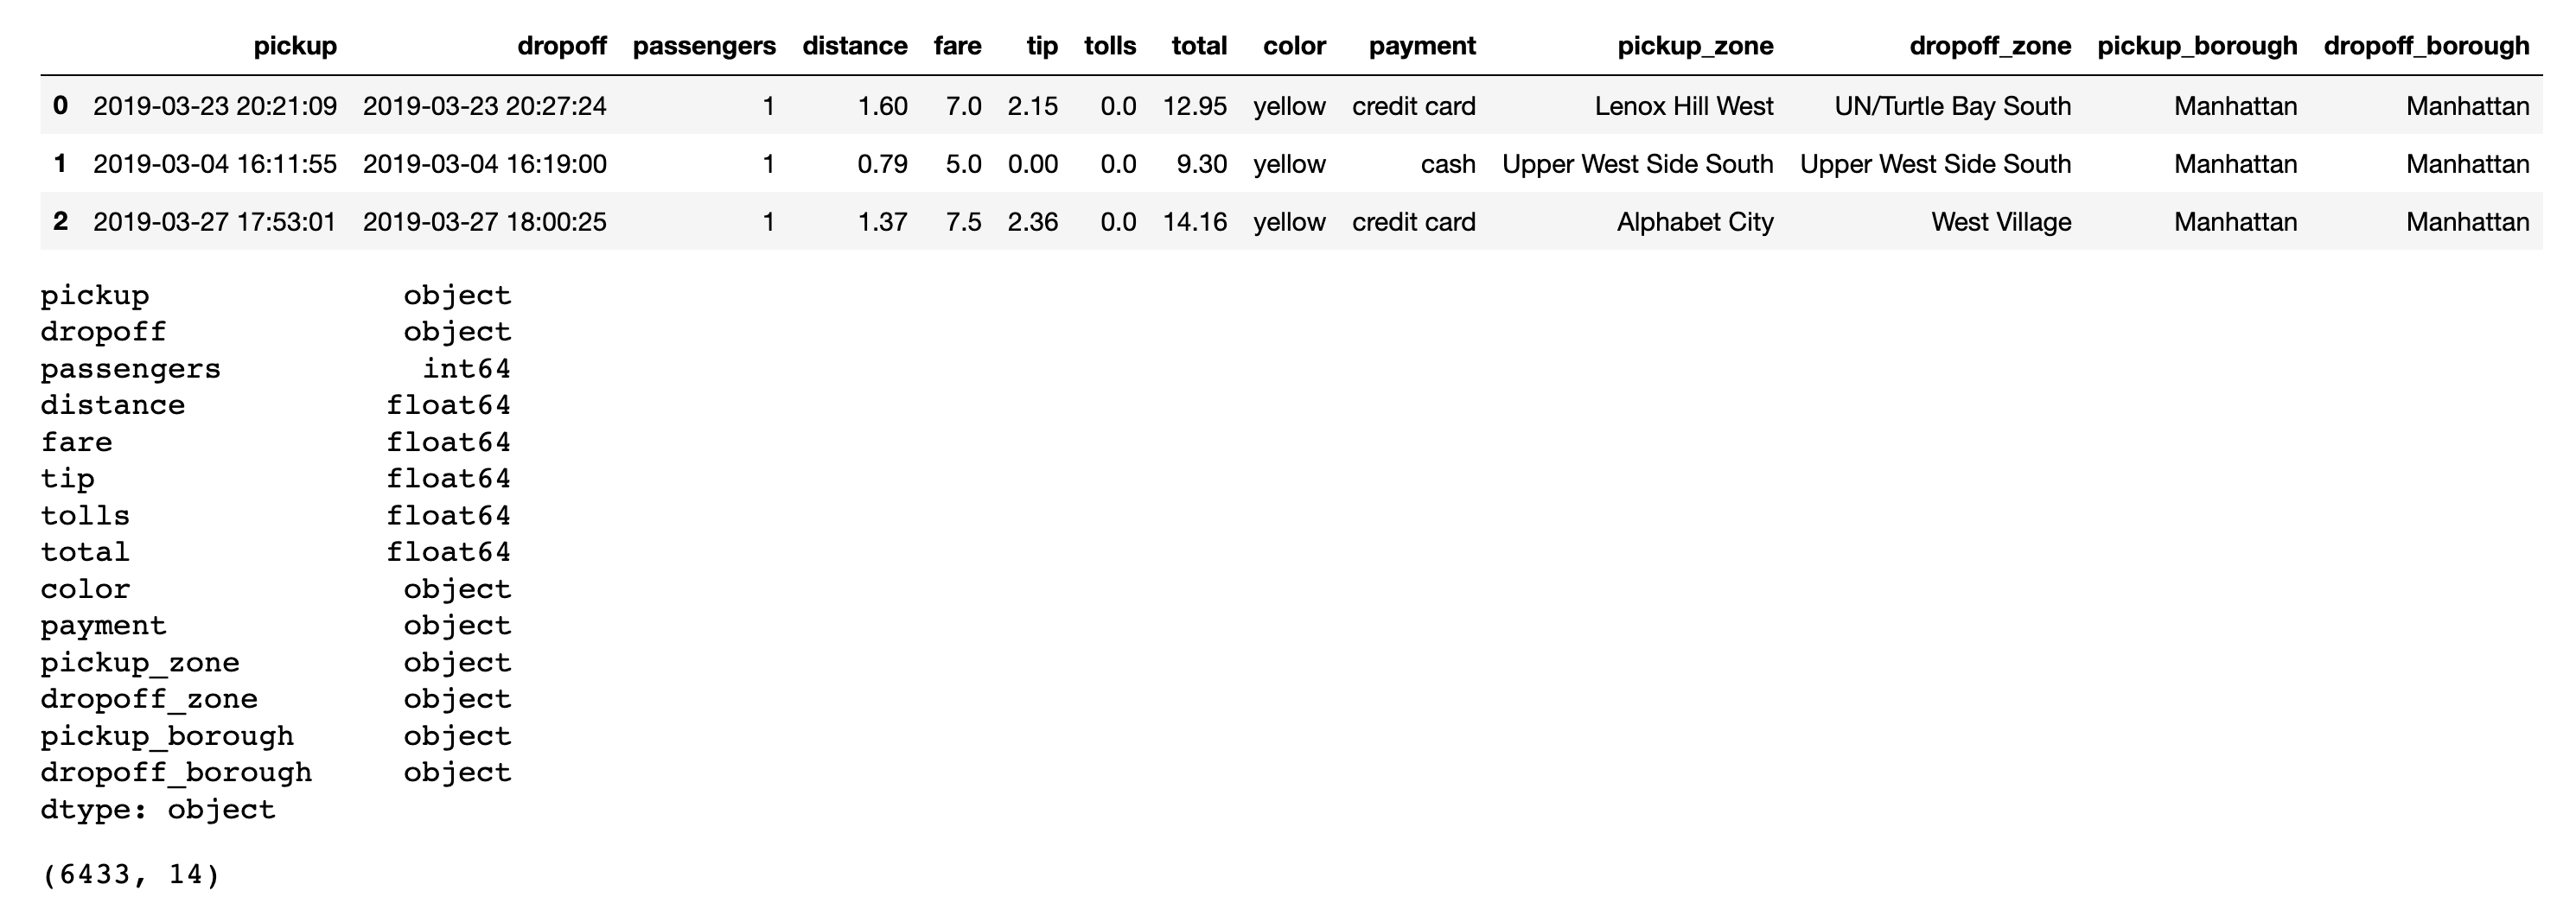

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [16]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [17]:
df_taxi.dropoff_borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', nan, 'Bronx', 'Staten Island'],
      dtype=object)

In [21]:
df_taxi.dropoff_borough.value_counts('na') 

dropoff_borough
Manhattan        0.814966
Queens           0.084847
Brooklyn         0.078428
Bronx            0.021446
Staten Island    0.000313
Name: proportion, dtype: float64

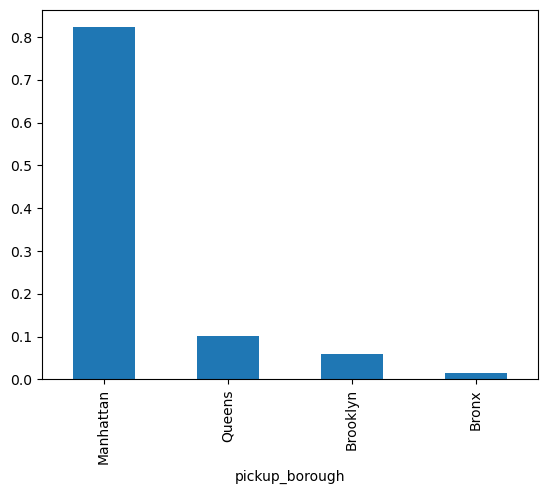

In [28]:
df_taxi.pickup_borough.value_counts('na') .plot.bar();

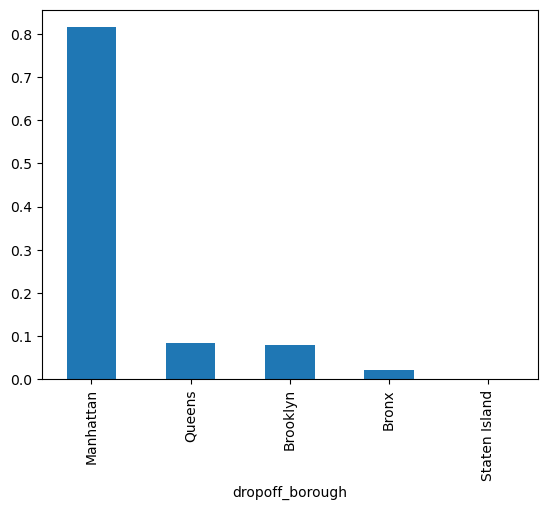

In [29]:
df_taxi.dropoff_borough.value_counts('na') .plot.bar();

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [49]:
column_w_most_NaNs = df_taxi.isna().sum().idxmax()
rows_w_most_NaNs = df_taxi[df_taxi[column_w_most_NaNs].isna()]
display(rows_w_most_NaNs)



,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

Якщо факт поїздки зафіксований (дата і час) і оплата пройшла (тотал), то пропущені значення можуть бути повязані з помилкою при вводі чи зборі даних (не зафіксований район, відстань чи інші деталі). Але оскільки поїзка відбулась, то такі пропуски можна заповнити і працювати з набором далі, а не видаляти.

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [28]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [13]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

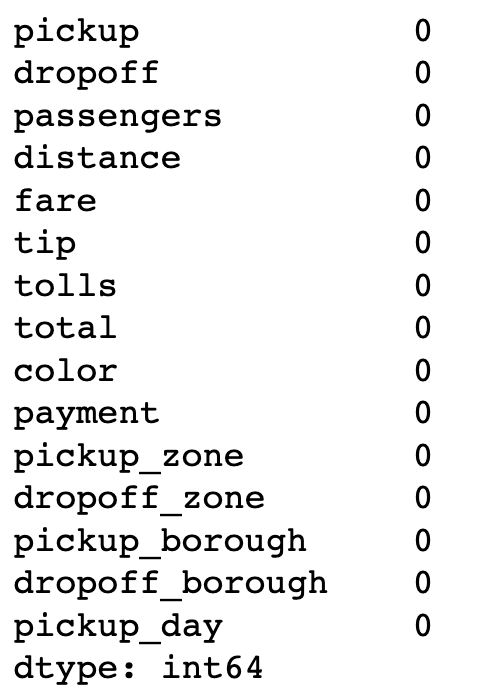

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [29]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

Після виконання завдання запустіть наступну клітинку:

In [15]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

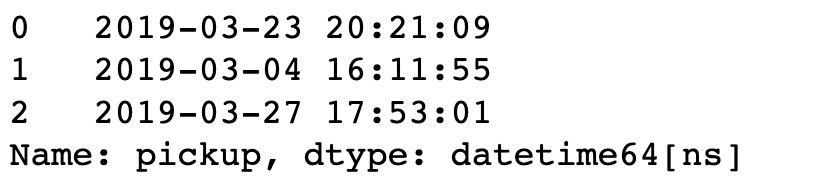

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [30]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

In [202]:
df_taxi_clean.pickup_day.head(3)

0   2019-03-23
1   2019-03-04
2   2019-03-27
Name: pickup_day, dtype: datetime64[ns]

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

In [17]:
total_by_day = df_taxi_clean.groupby('pickup_day').total.sum()

In [31]:
custom_style = {
    'figure.dpi': 170,
    'figure.figsize': (8, 3),
    'figure.facecolor': '#ffffff',
    'axes.facecolor': '#ffffff',
    'lines.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.bottom': True,
    'axes.spines.left': False,
    'axes.edgecolor': '000000',
    'axes.linewidth': 0.3,
    'text.color': '#000000',
    'font.family': 'Archivo',
    'font.weight': 'regular',
    'font.size': 9,
    'axes.grid': False,
    'axes.titlepad': 12,
    'axes.titlelocation': 'left',
    'xtick.major.width': 0,
    'ytick.major.width': 0,
}

line_colors = ['#967aa1', '#ff758f', '#2A324B', '#ffb4a2', '#bbd0ff']  # Add more colors if needed

custom_style['axes.prop_cycle'] = plt.cycler(color=line_colors)

plt.rcParams.update(custom_style)

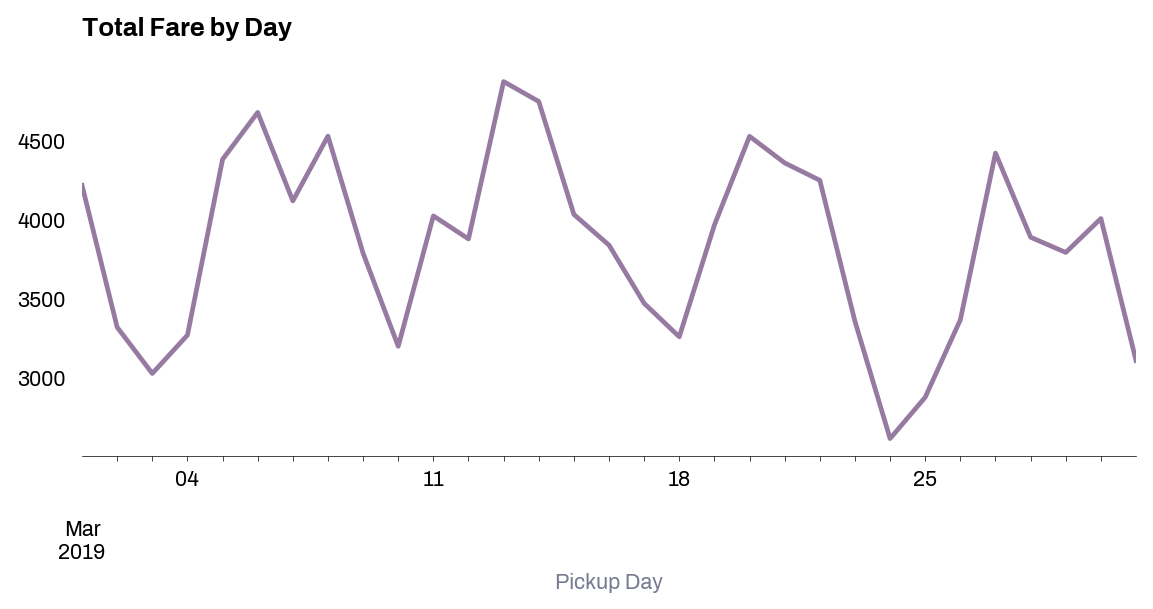

In [243]:
total_by_day.plot(color=plt.rcParams['lines.color'])
plt.xlabel('Pickup Day', color='#767B91')
plt.title('Total Fare by Day', fontweight='bold');

Поділки шкали Х починаються не з початку і з занадто низького значення + є якийсь патерн в залежності від дня тижня

Очікується графік:

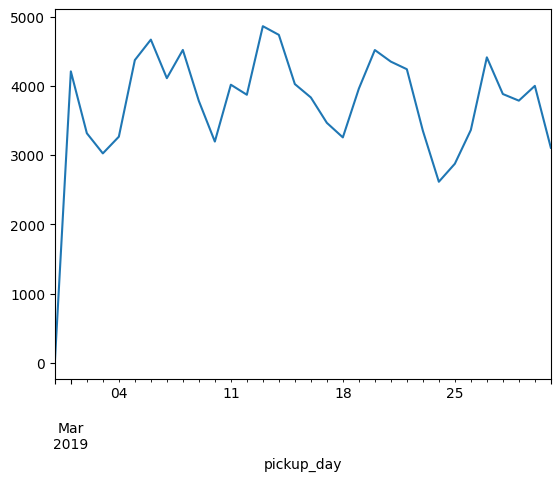

6.Виведіть кількість рядків для кожного pickup_day.

In [220]:
df_taxi_clean['pickup_day'].value_counts()

pickup_day
2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: count, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [32]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']


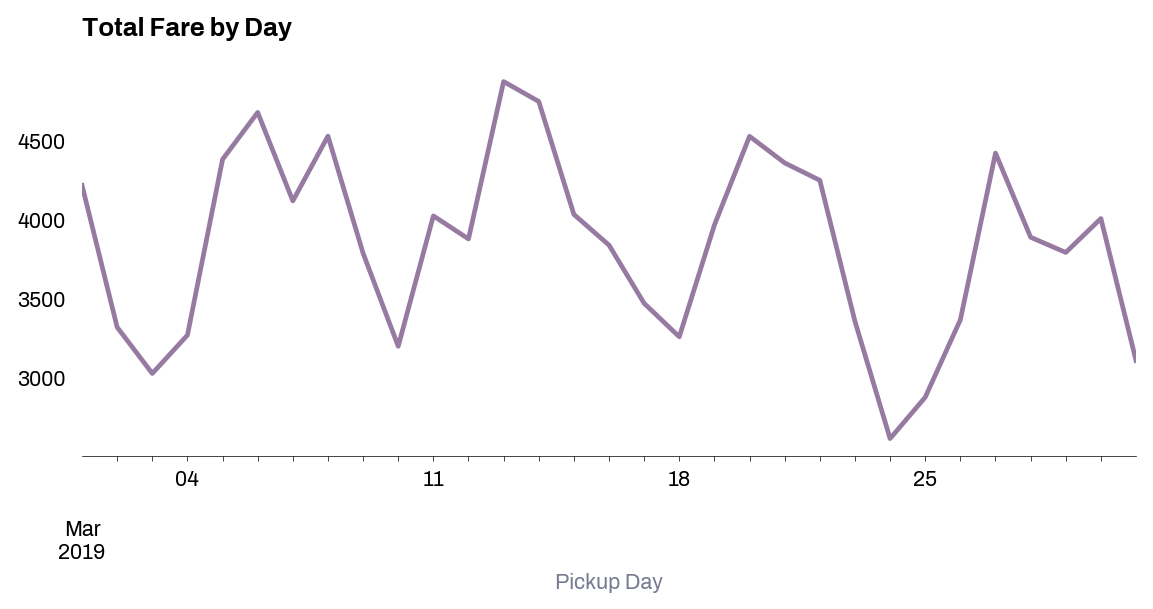

Очікуваний графік:

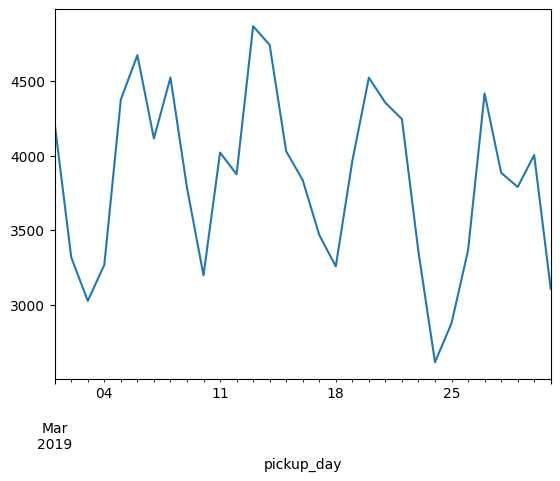

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [56]:
borough_pivot = df_taxi_clean.pivot_table(index=['pickup_day'], columns=['pickup_borough'], values='total', aggfunc='sum')
borough_pivot = borough_pivot.loc[:, borough_pivot.columns.get_level_values('pickup_borough') != 'NA'] 
borough_pivot






pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

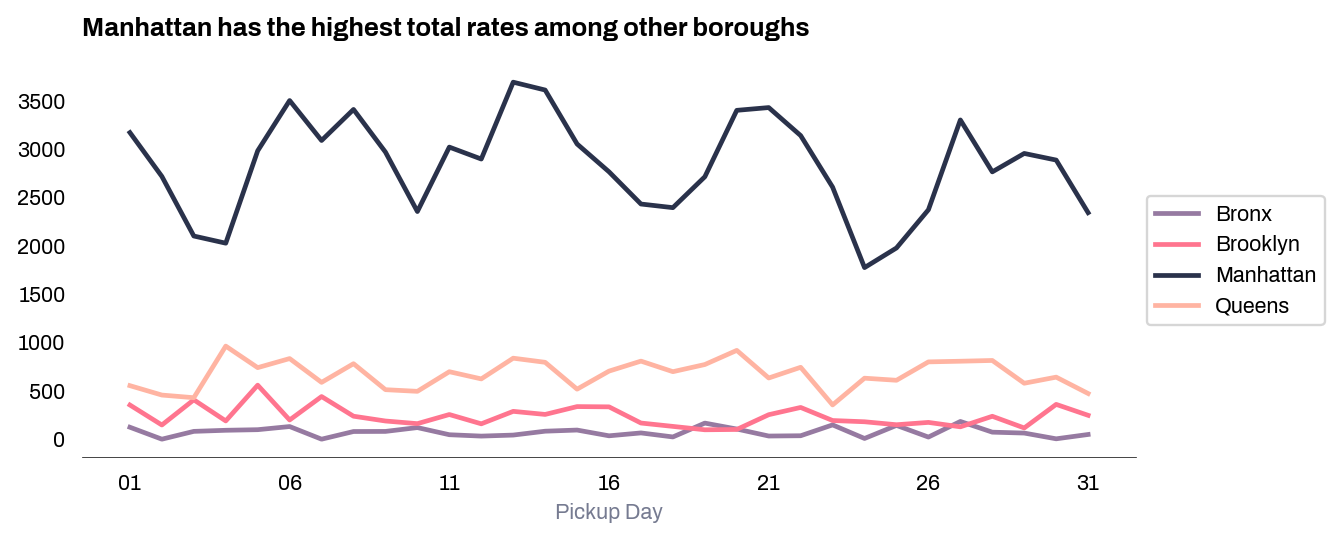

In [57]:
borough_pivot['pickup_day'] = borough_pivot.index.strftime('%d')

borough_pivot.fillna(0).plot(x='pickup_day')

plt.xlabel('Pickup Day', color='#767B91')
plt.title('Manhattan has the highest total rates among other boroughs', fontweight='bold', color='#000000')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


Очікуваний графік :

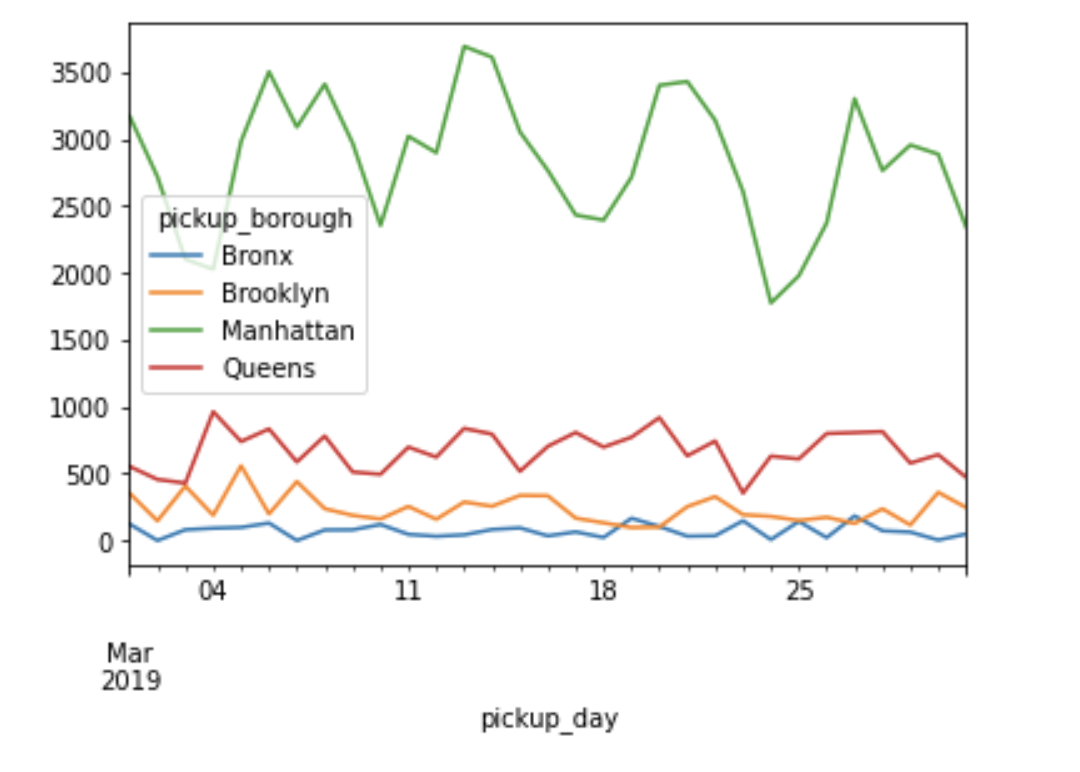

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

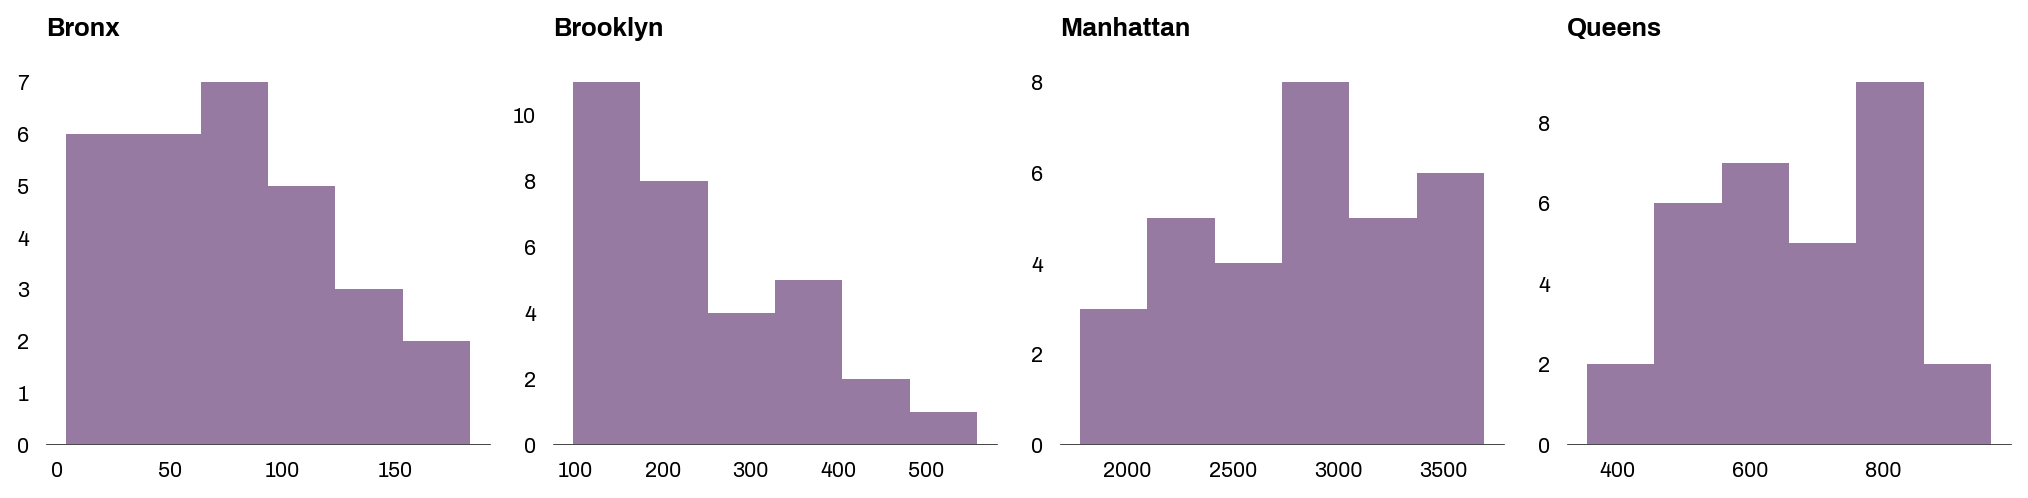

In [327]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

boroughs = borough_pivot.columns.get_level_values('pickup_borough').unique()

for i, borough in enumerate(boroughs):
    ax = axes[i]
    data = borough_pivot[('total', borough)]
    ax.hist(data, bins=6)
    ax.set_title(borough, fontweight='bold')
    

plt.tight_layout();


Для загальної(не перевантаженої деталями картинки) обрала середнє між 5 та 8 бінами. Здалось що так гарно видно загалом розподіл і не занадто спрощено.

Приклад одного з правильних виконань завдання:

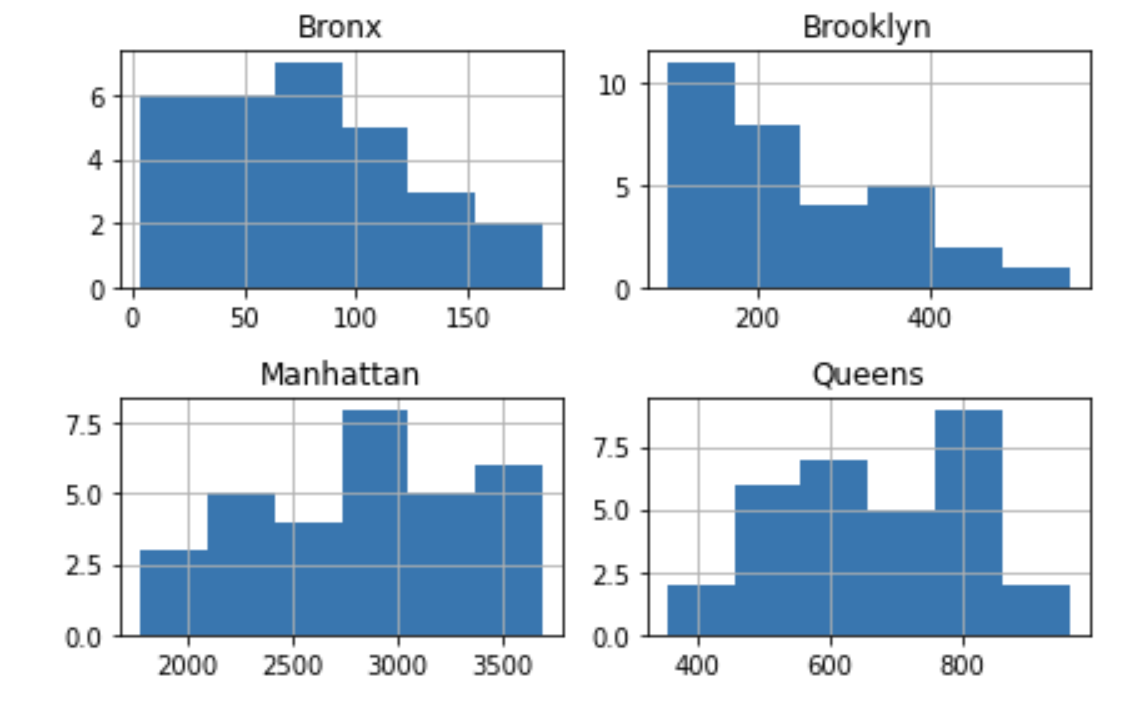

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

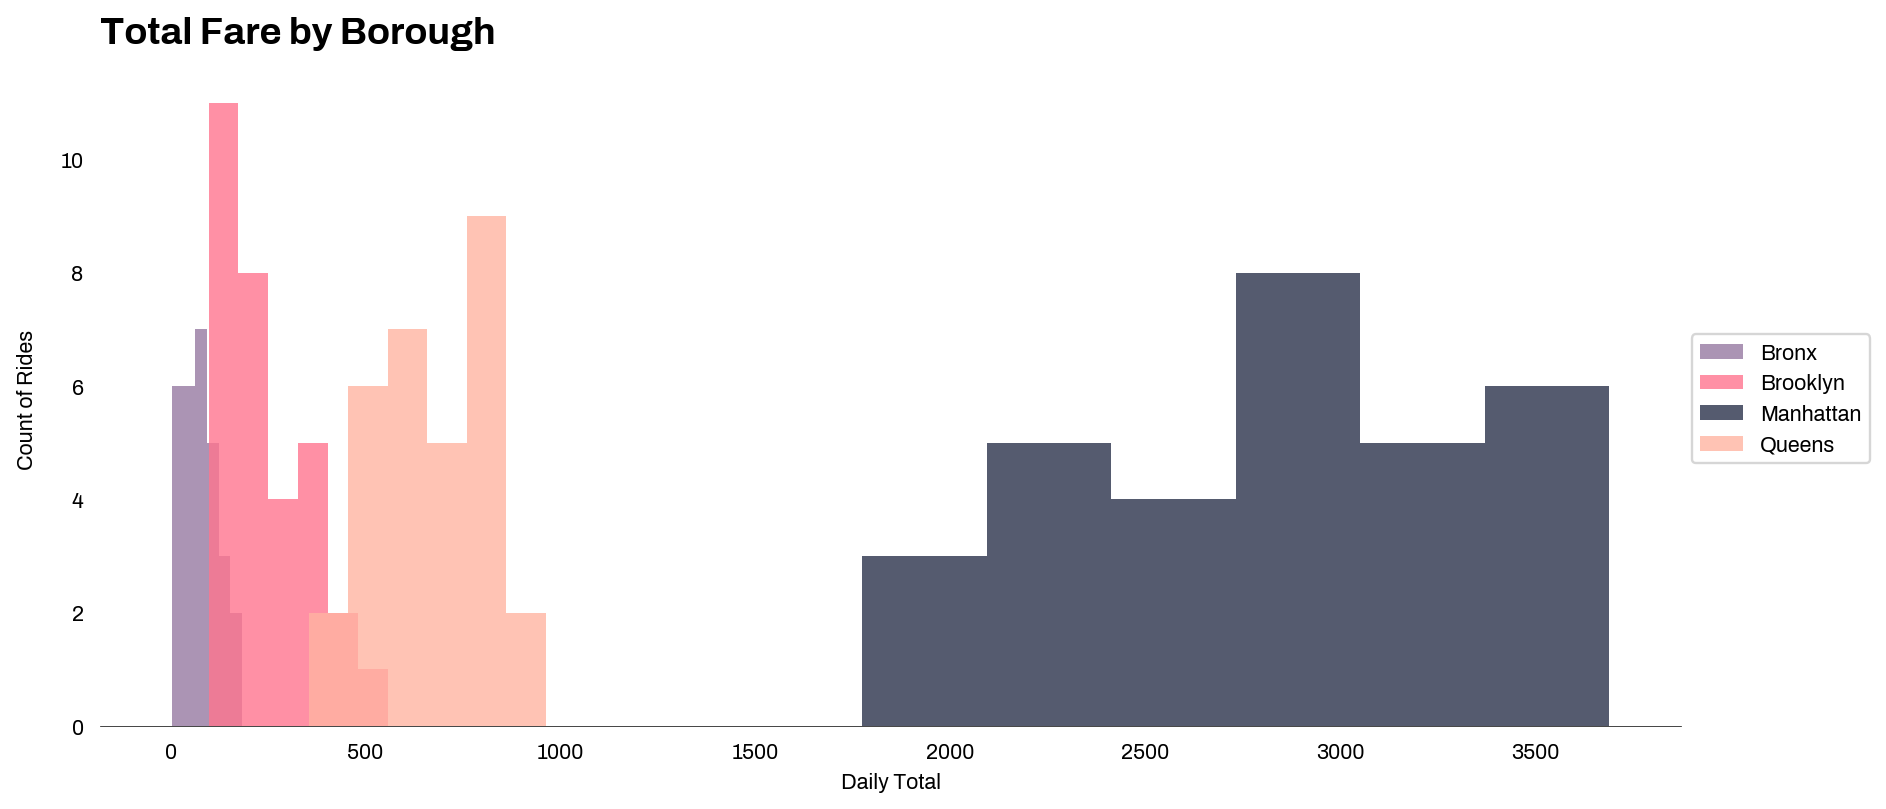

In [352]:
fig, ax = plt.subplots(figsize=(12, 5))

boroughs = borough_pivot.columns.get_level_values('pickup_borough').unique()
alpha = 0.8

for borough in boroughs:
    data = borough_pivot[('total', borough)]
    ax.hist(data, bins=6, alpha=alpha, label=borough)
    
    
ax.set_title('Total Fare by Borough', fontweight='bold', fontsize=16)
ax.set_xlabel('Daily Total')
ax.set_ylabel('Count of Rides', rotation=90, labelpad=10)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Очікуваний результат:

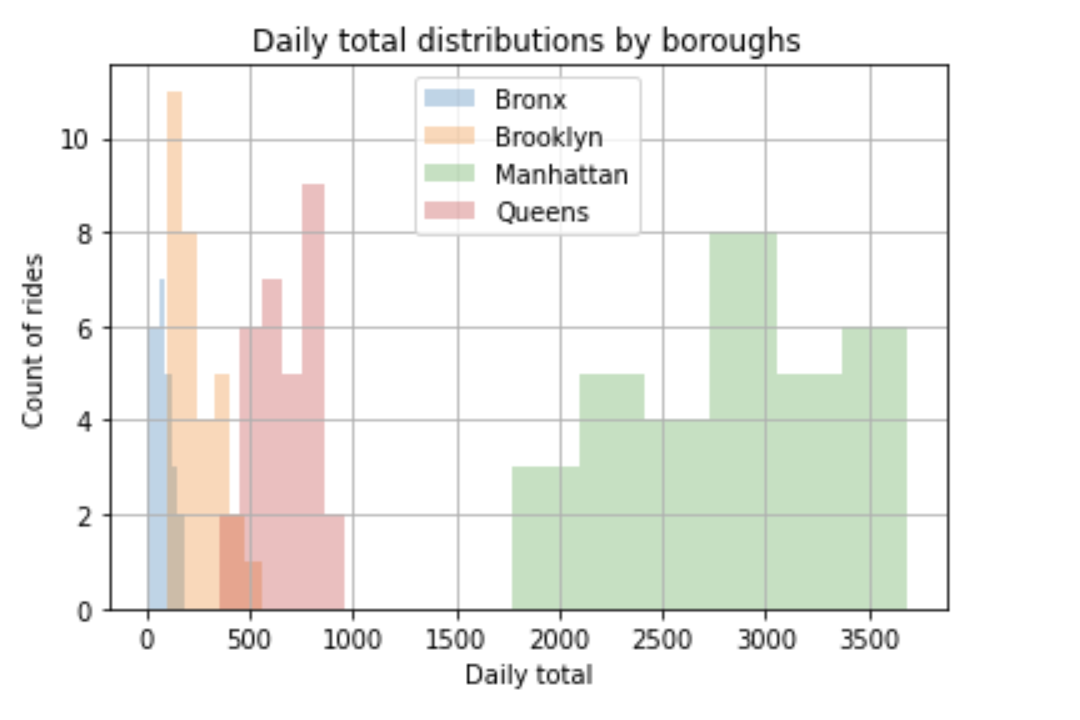

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

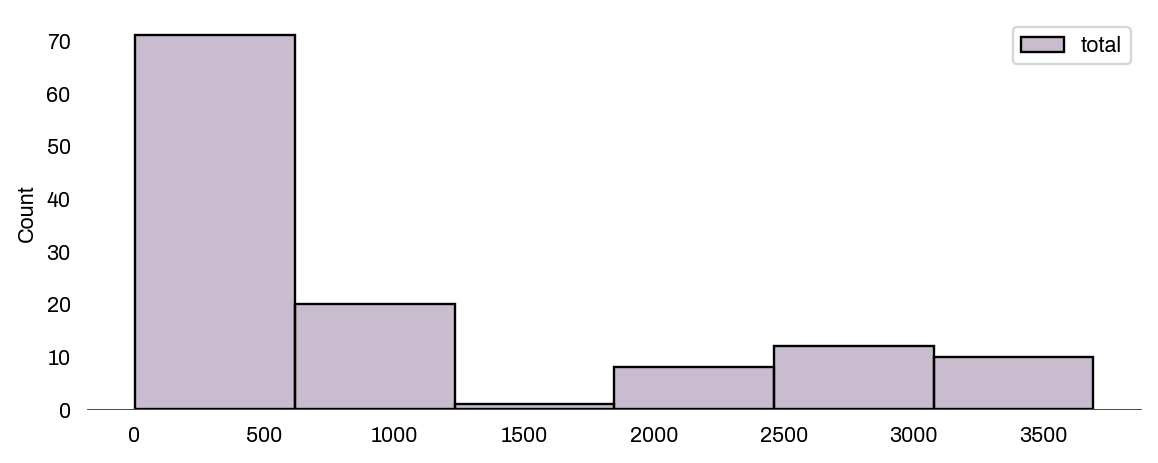

In [354]:
sns.histplot(data=borough_pivot, bins=6);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

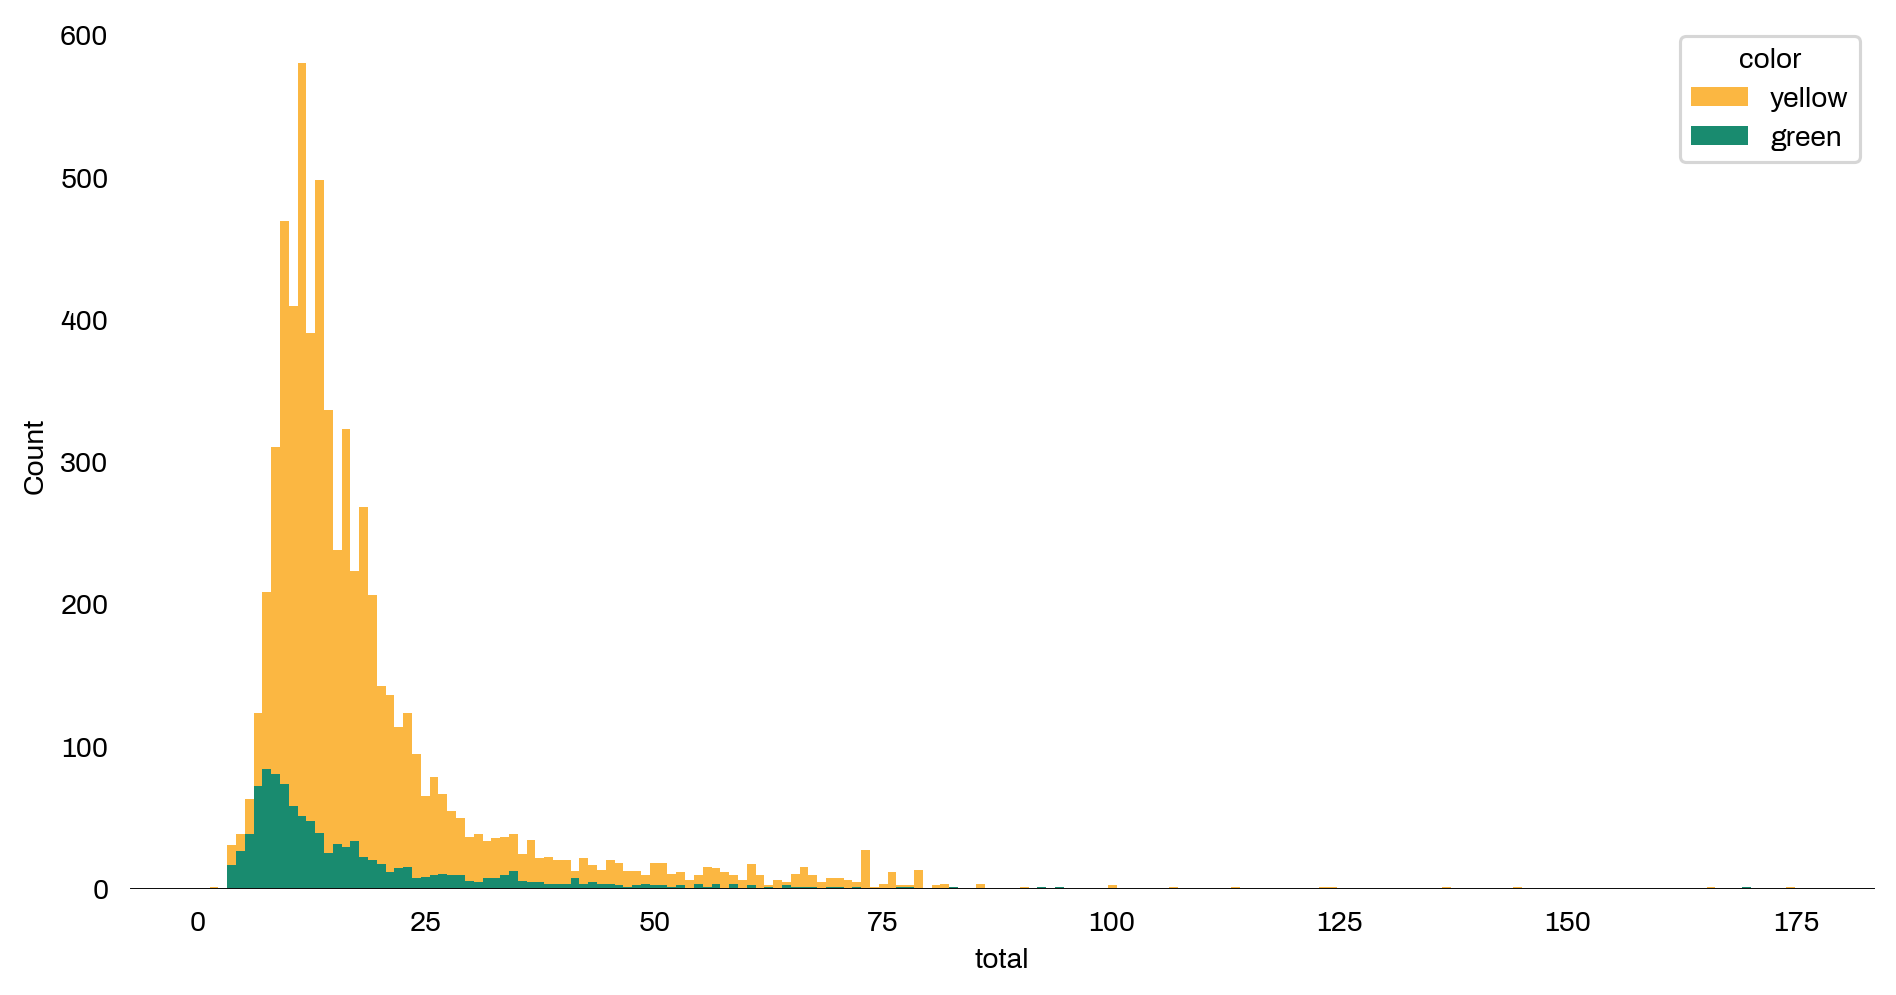

In [374]:
plt.figure(figsize=(10, 5), dpi=225)

taxi_colors = ['#fbb02d', '#007f5f']

sns.histplot(data=df_taxi_clean, x='total', hue='color', multiple='stack', element='step', bins=180,
             palette=taxi_colors, edgecolor='none', alpha=0.9);

Очікуваний результат:

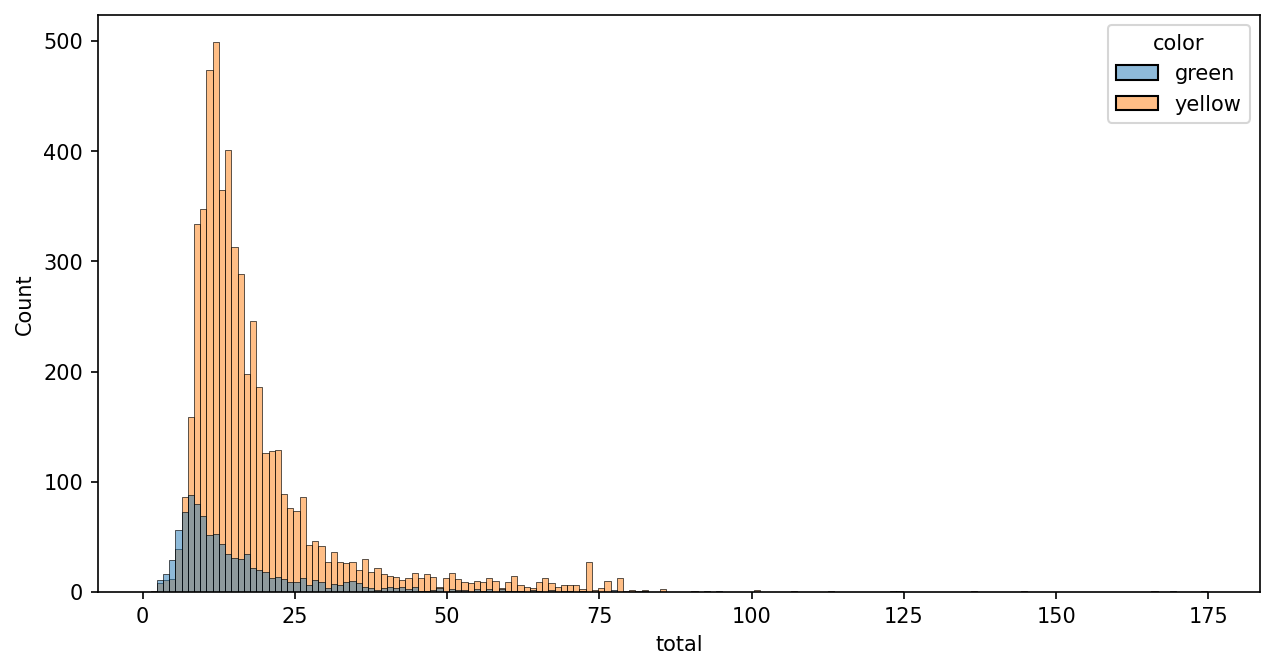

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

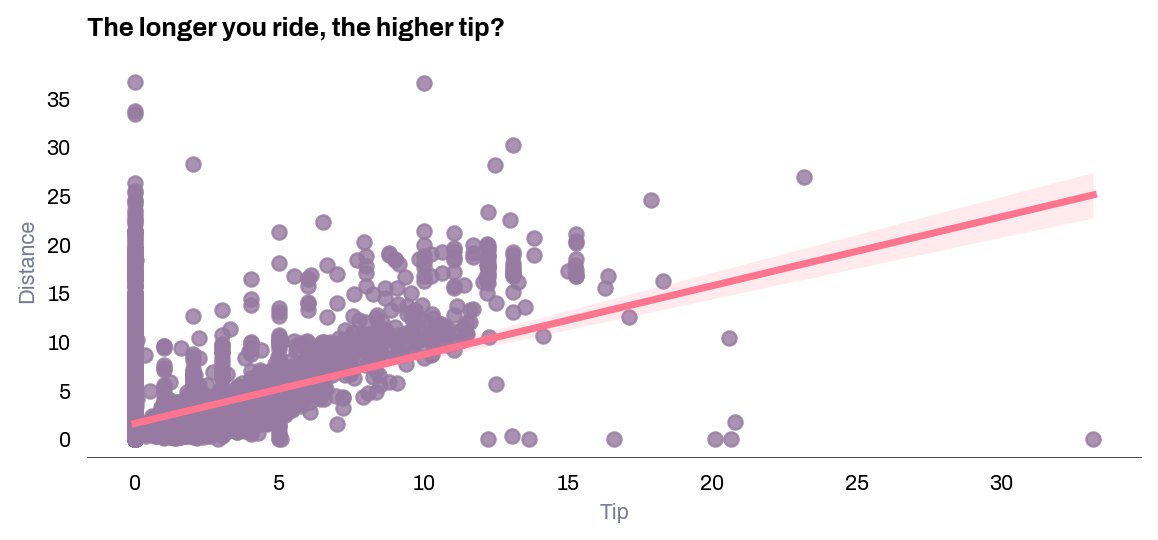

In [402]:
sns.scatterplot(data=df_taxi_clean, x='tip', y='distance', alpha=0.1, edgecolor='none')

sns.regplot(data=df_taxi_clean, x='tip', y='distance', line_kws={'color': '#ff758f'})

plt.xlabel('Tip', color='#767B91')
plt.ylabel('Distance', color='#767B91')
plt.title('The longer you ride, the higher tip?', fontweight='bold');

Один з можливих результатів (побудовано з seaborn):

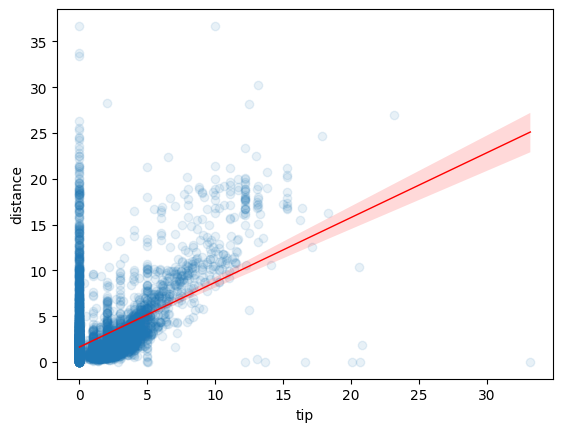

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Поїздки без чайових. Зі збільшенням відстані, таких поїздок все менше.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

In [61]:
df_taxi_clean['tip'].describe()

count    6432.000000
mean        1.979527
std         2.448626
min         0.000000
25%         0.000000
50%         1.700000
75%         2.800000
max        33.200000
Name: tip, dtype: float64

In [104]:
average_tips_pivot = df_taxi_clean.pivot_table(index=['pickup_day'], columns='pickup_borough', values='tip', aggfunc='mean')
average_tips_pivot['pickup_day'] = average_tips_pivot.index.strftime('%d')
average_tips_pivot = average_tips_pivot.loc[:, average_tips_pivot.columns.get_level_values('pickup_borough') != 'NA'] 
average_tips_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens,pickup_day
pickup_day,,,,,
2019-03-01,0.194286,0.922353,2.043161,1.300000,01
2019-03-02,NaN,0.681000,1.739006,1.752353,02
2019-03-03,0.333333,1.339091,1.895426,2.196429,03
2019-03-04,0.000000,0.397000,1.657405,4.555600,04
2019-03-05,0.000000,0.823158,1.904469,2.665714,05
2019-03-06,0.000000,0.608000,2.074787,3.171538,06
2019-03-07,NaN,1.268125,1.882139,4.332667,07
2019-03-08,0.500000,0.468182,1.966904,3.813636,08
2019-03-09,0.000000,1.323333,1.845439,2.175000,09


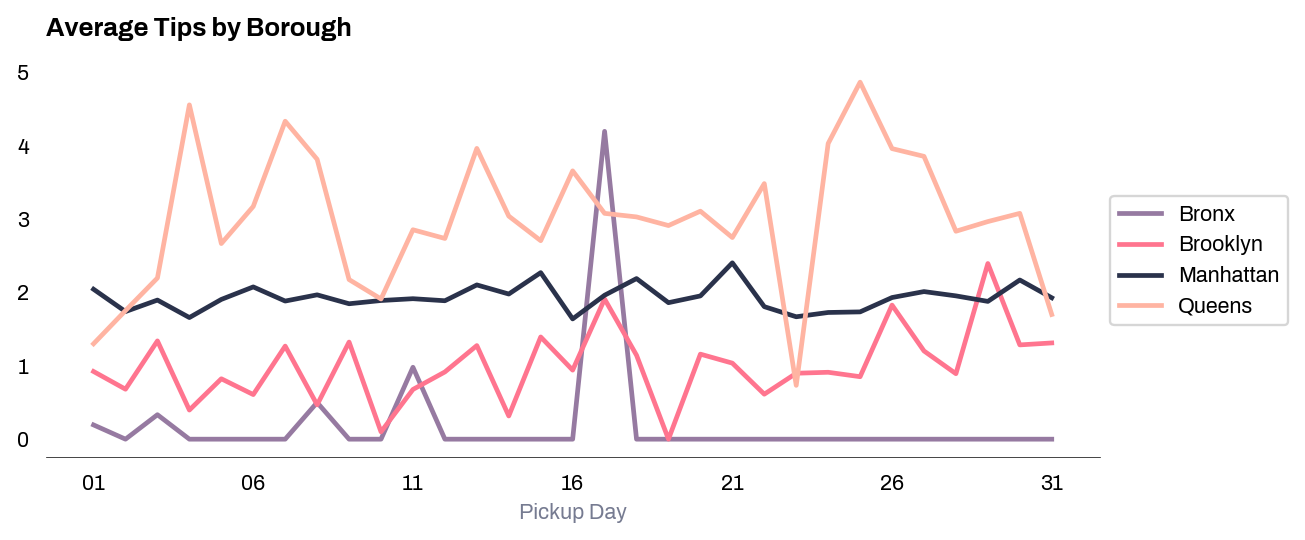

In [105]:
average_tips_pivot.fillna(0).plot(x='pickup_day')

plt.xlabel('Pickup Day', color='#767B91')
plt.title('Average Tips by Borough', fontweight='bold', color='#000000')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

1. при початку поїздки в якому районі найрідше дають чайові? - Bronx
2. а в поїздках з якого району найчастіше дають чайові? - Queens (якщо я правильно зрозуміла питання)))
3. при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)? - Manhattan

Один з можливих результатів (побудовано з seaborn):

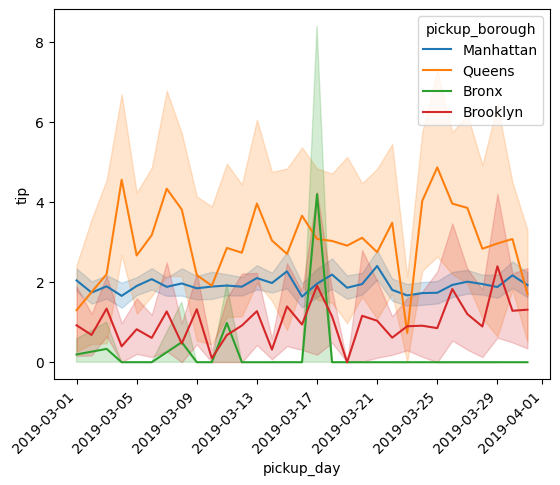

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

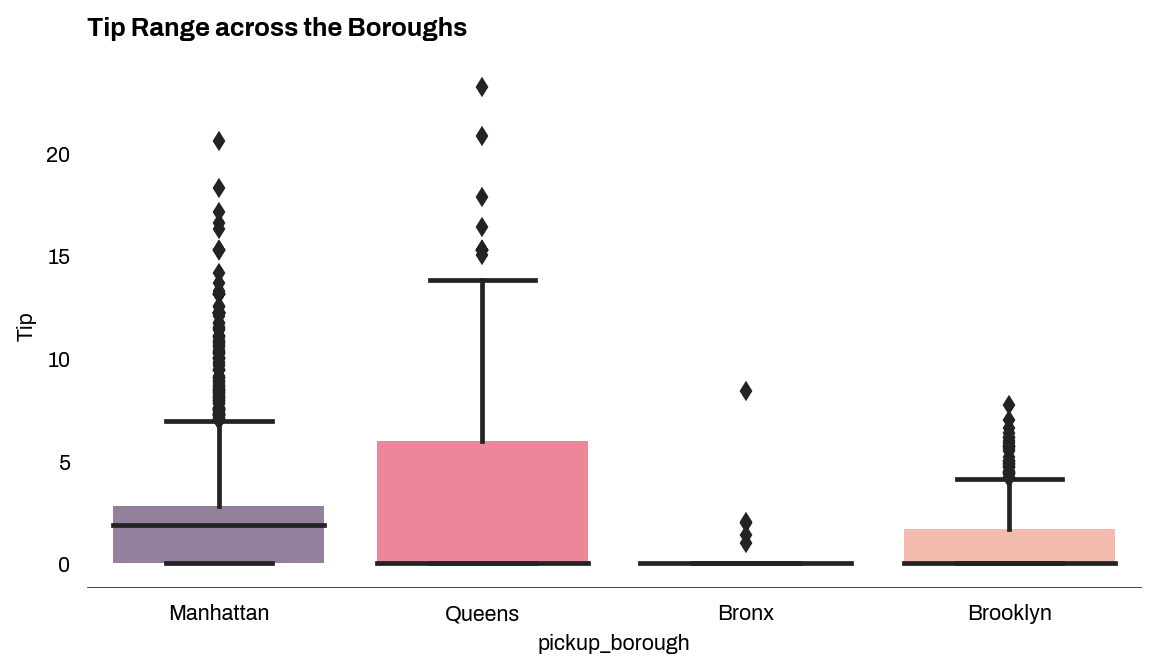

In [126]:
boxprops = dict(linewidth=0)  

plt.figure(figsize=(8, 4))
sns.boxplot(x='pickup_borough', y='tip', data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], boxprops=boxprops)

plt.ylabel('Tip')
plt.title('Tip Range across the Boroughs', fontweight='bold', color='#000000')
plt.xticks(rotation=0);

Один з можливих результатів (побудовано з seaborn):

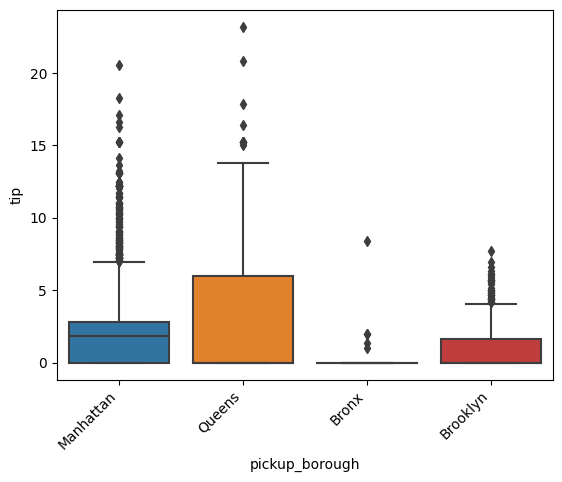

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

1. Цікаво подивитись який метод оплати найбільш часто використовують. Це може допомогти зрозуміти як покращити сервіс.


In [163]:
len(df_taxi_clean.pickup_day)

6432

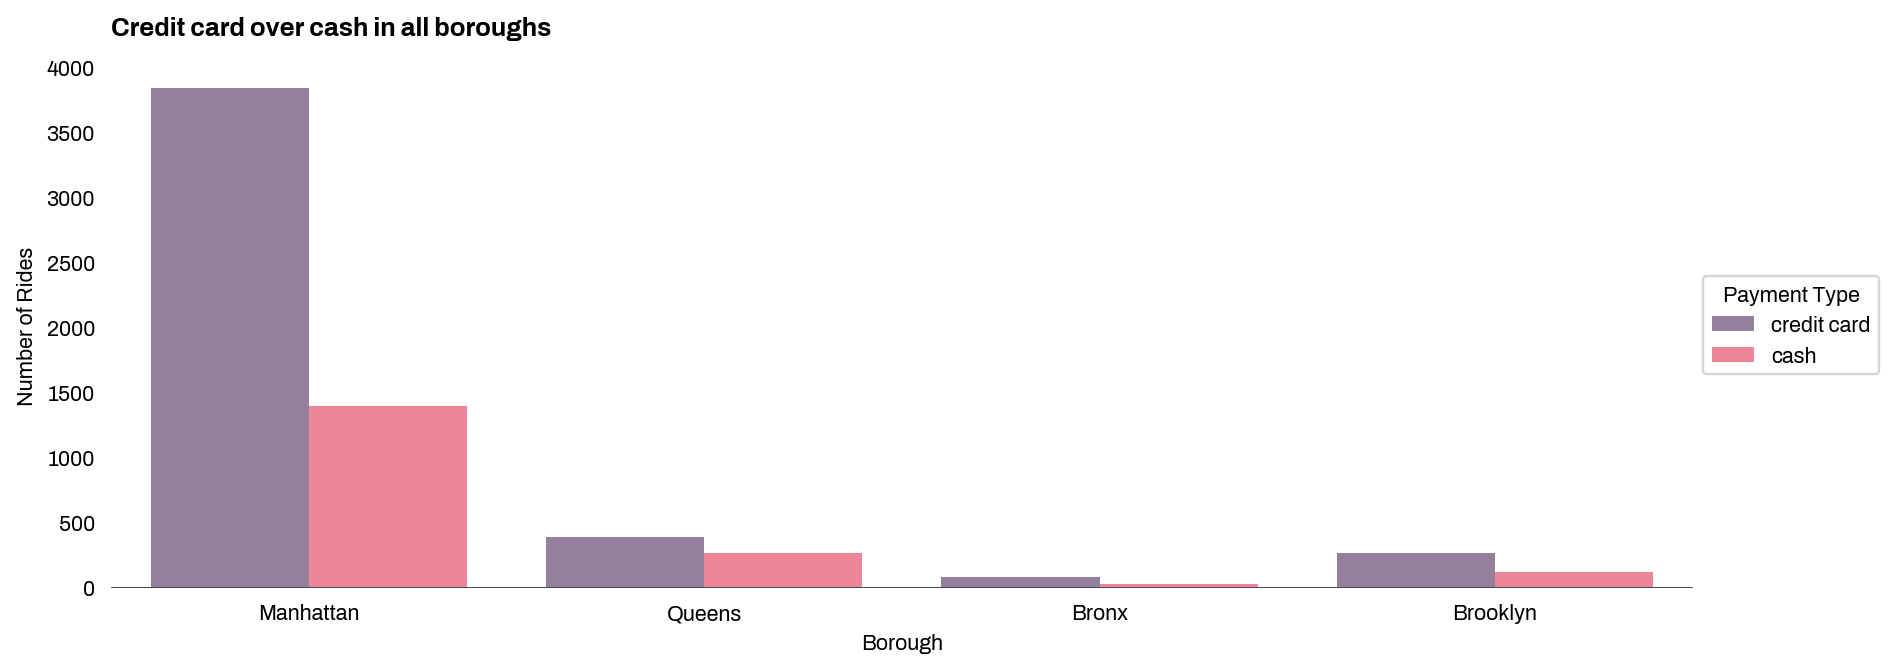

In [165]:
data = df_taxi_clean[(df_taxi_clean['pickup_borough'] != 'NA') & (df_taxi_clean['payment'] != 'NA')]

plt.figure(figsize=(12, 4))
sns.barplot(x='pickup_borough', y=data.index, estimator=len, data=data, hue='payment')

plt.title('Credit card over cash in all boroughs', fontweight='bold', color='#000000')
plt.xlabel('Borough')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

plt.legend(title='Payment Type', loc='center left', bbox_to_anchor=(1, 0.5));


По всіх районах найбільше розплачуються карткою. Єдиний район, де найменша різниця по кількості поїздок по обох видам оплати, це Квінс. Цікаво з чим це повязано. Але він найбільший серед інших. Я б звернула на це увагу і спробувала закіцавити людей цього району більше користуватись кредиткою.

2. Виїждаючи з якого району маємо найдовші по відстані поїздки? Можливо є сенс для цих районів спробувати впровадити опції з каршерінгу (щоб на 1 таксі могли їхати двоє або троє пасажирів з одного району)

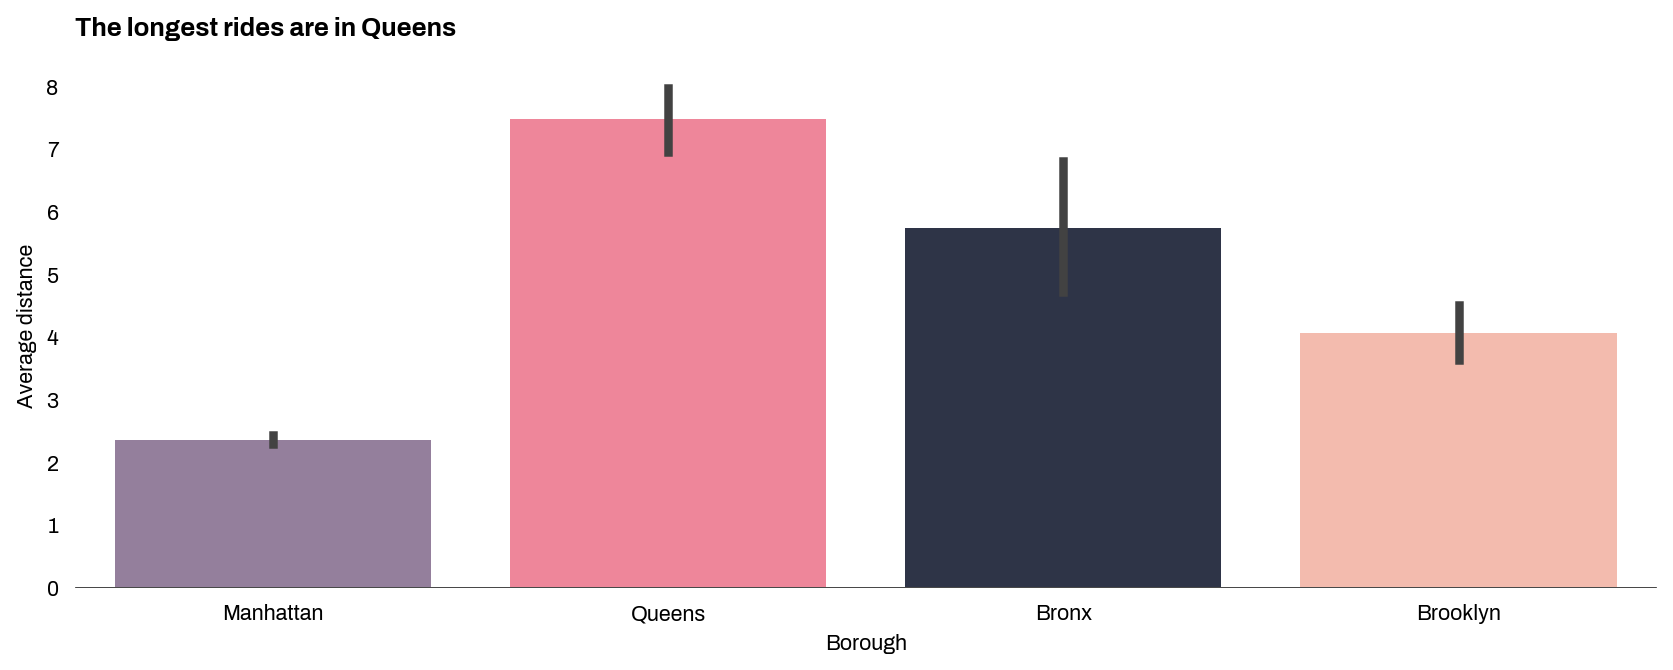

In [175]:
data = df_taxi_clean[(df_taxi_clean['pickup_borough'] != 'NA') & (df_taxi_clean['distance'] != 'NA')]

plt.figure(figsize=(12, 4))
sns.barplot(x='pickup_borough', y='distance', data=data)

plt.title('The longest rides are in Queens', fontweight='bold', color='#000000')
plt.xlabel('Borough')
plt.ylabel('Average distance')
plt.xticks(rotation=0);

Для Квінса і Бронкса є сенс подумати про каршерінг, щоб пасажири могли економити кошти, бо вигідніше розділити тариф + це більш екологічно. 

3. Чи залежить базовий тариф від дальності поїздки?

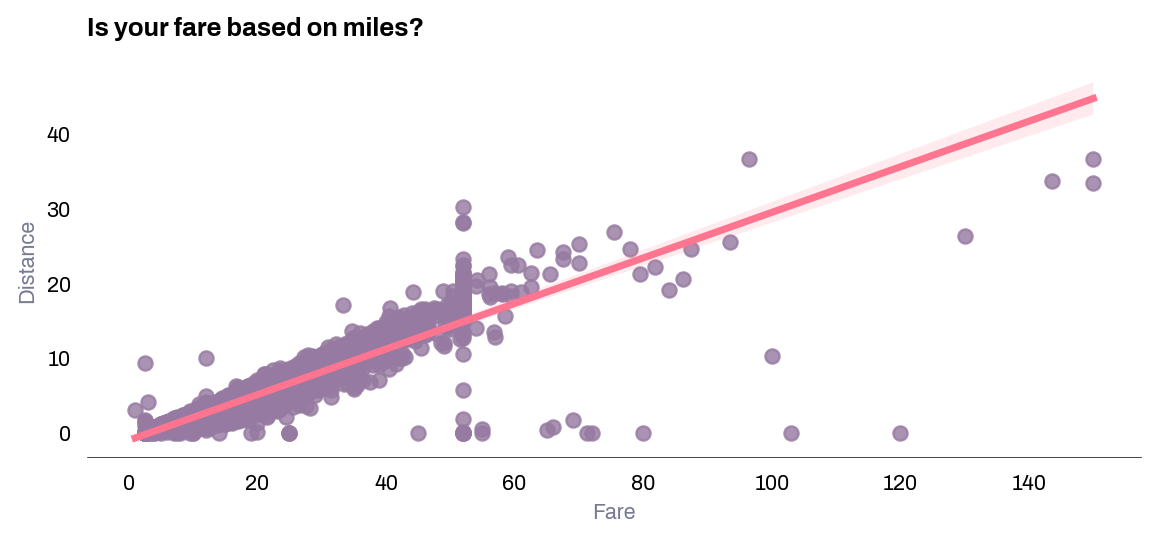

In [177]:
sns.scatterplot(data=df_taxi_clean, x='fare', y='distance', alpha=0.1, edgecolor='none')

sns.regplot(data=df_taxi_clean, x='fare', y='distance', line_kws={'color': '#ff758f'})

plt.xlabel('Fare', color='#767B91')
plt.ylabel('Distance', color='#767B91')
plt.title('Is your fare based on miles?', fontweight='bold');

Є чітка залежність мінімального тарифу від відстані. 

А від району?

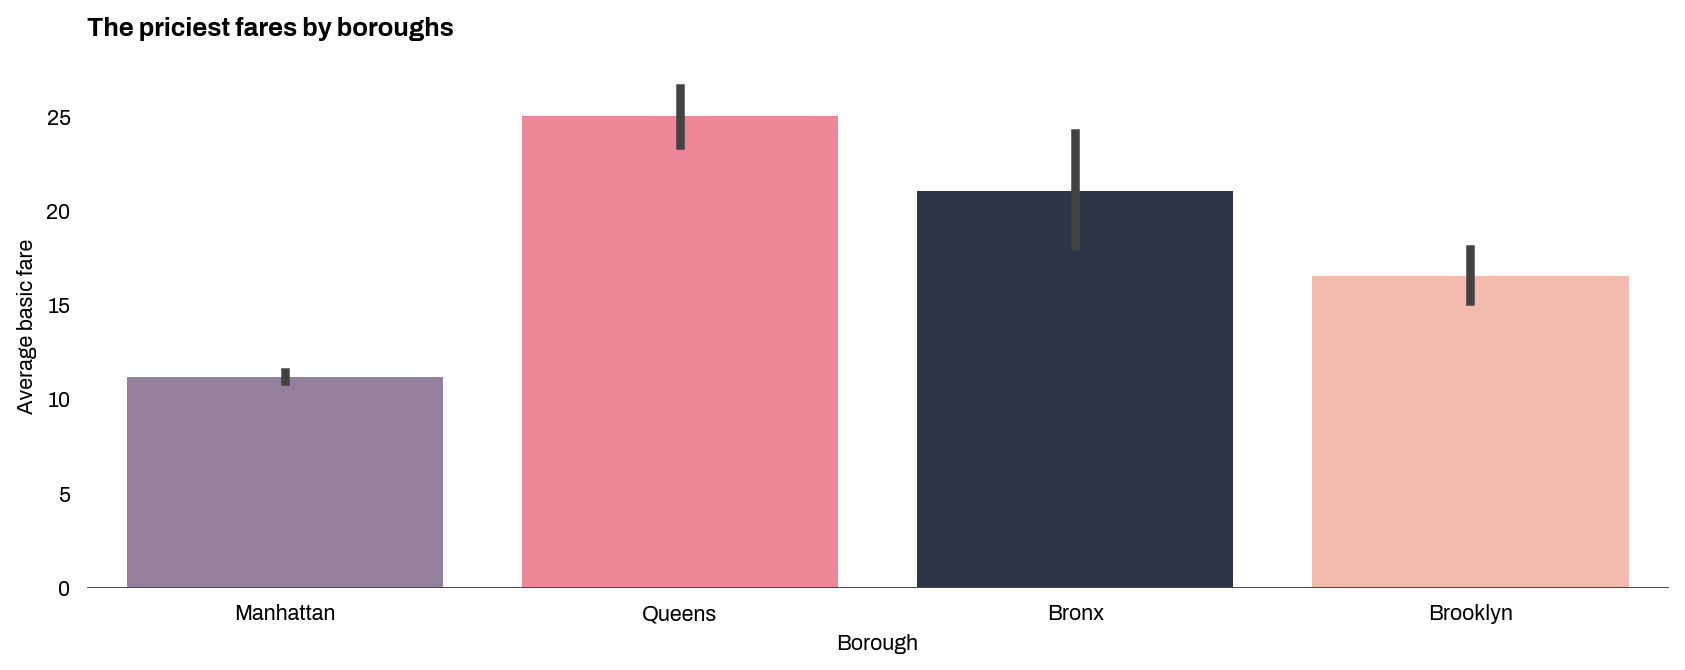

In [179]:
data = df_taxi_clean[(df_taxi_clean['pickup_borough'] != 'NA')]

plt.figure(figsize=(12, 4))
sns.barplot(x='pickup_borough', y='fare', data=data)

plt.title('The priciest fares by boroughs', fontweight='bold', color='#000000')
plt.xlabel('Borough')
plt.ylabel('Average basic fare')
plt.xticks(rotation=0);

Тут теж логічно, що найдовші поїзки - найдорожчі. Якщо компанії це було б вигідно, то можна було б додати кількість машин на такі райони. Або якщо навпаки ці райони найбільш затратні по обслуговуванню, то виходити з них.